ARIMA单变量时间序列预测
---
    https://blog.csdn.net/u012735708/article/details/82460962
    修改绘图格式，防止与其他使用同链接的人撞图
    
    https://www.cnblogs.com/foley/p/5582358.html

    https://www.cnblogs.com/bradleon/p/6832867.html

## 导入数据

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import matplotlib.pyplot as plt
# plt.style.use('classic')

save_path = './第二篇/4/'

In [4]:
data = pd.read_csv('./road2.csv')

In [5]:
data.head()

,time,VIS
0,6:30:26,99.700284
1,6:31:08,104.987216
2,6:31:50,102.163352
3,6:32:31,100.315341
4,6:33:13,103.926136


In [6]:

data['time'] = data['time'].apply(lambda x: '2016-4-14 '+x)



data.set_index('time',inplace = True)
data.index = pd.to_datetime(data.index)
ts = data['VIS']

In [7]:
font = {'weight' : 'normal',
'size' : 20,
}


## 观察数据

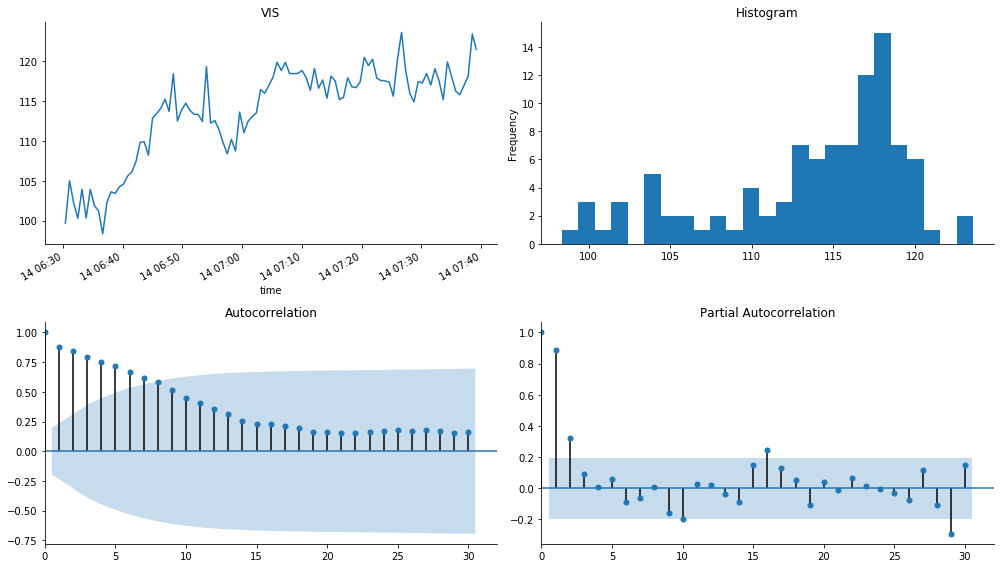

In [8]:
#直观：
import statsmodels.tsa.api as smt
#Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout,(0,0))
    hist_ax=plt.subplot2grid(layout,(0,1))
    acf_ax=plt.subplot2grid(layout,(1,0))
    pacf_ax=plt.subplot2grid(layout,(1,1))
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    plt.savefig(save_path + '观察数据.png')
    #return ts_ax,acf_ax,pacf_ax
tsplot(ts, title='VIS', lags=30)


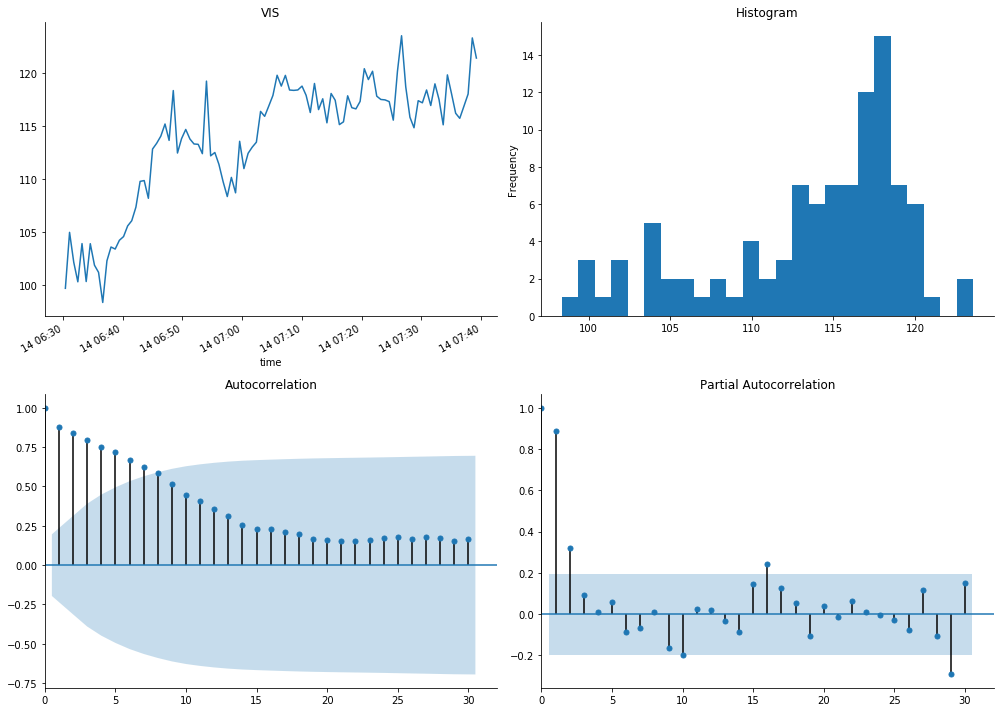

In [9]:
#直观：
import statsmodels.tsa.api as smt
#Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
def tsplot(y,lags=None,title='',figsize=(14,10)):
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout,(0,0))
    hist_ax=plt.subplot2grid(layout,(0,1))
    acf_ax=plt.subplot2grid(layout,(1,0))
    pacf_ax=plt.subplot2grid(layout,(1,1))
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    plt.savefig(save_path + '观察数据11.png')
    #return ts_ax,acf_ax,pacf_ax
tsplot(ts, title='VIS', lags=30)


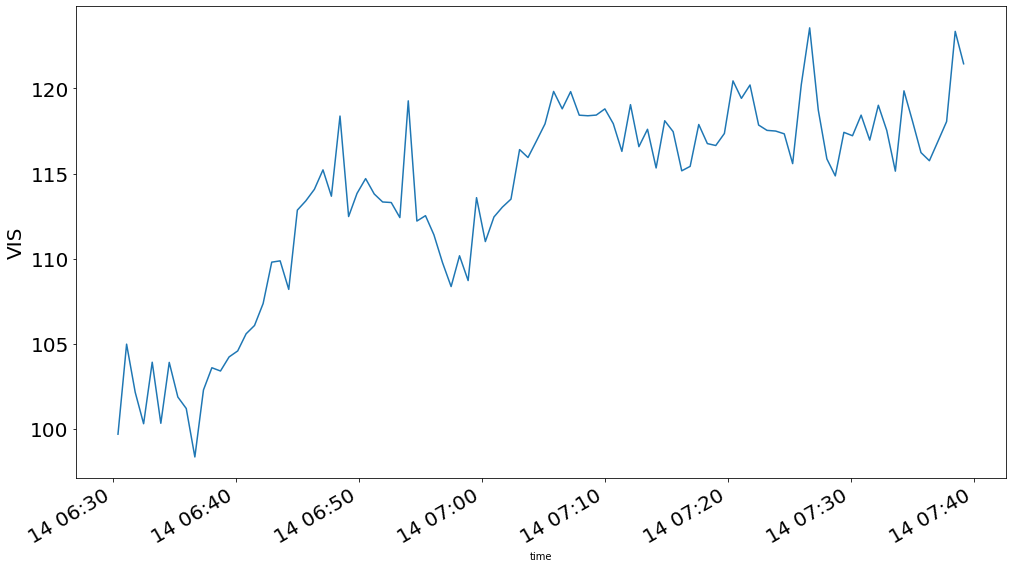

In [10]:
#直观：
import statsmodels.tsa.api as smt
#Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(1,1)
    ts_ax=plt.subplot2grid(layout,(0,0))
#     hist_ax=plt.subplot2grid(layout,(1,0))
#     acf_ax=plt.subplot2grid(layout,(1,0))
#     pacf_ax=plt.subplot2grid(layout,(1,1))
    y.plot(ax=ts_ax)
#     ts_ax.set_title(title,font)
#     y.plot(ax=hist_ax,kind='hist',bins=25)
#     hist_ax.set_title('Histogram')
#     smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
#     smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
#     [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
#     sns.despine()
    plt.tick_params(labelsize=20)
    plt.tight_layout()
    plt.ylabel("VIS",font)

    plt.savefig(save_path + '观察数据1图.png')
    #return ts_ax,acf_ax,pacf_ax
tsplot(ts, title='VIS', lags=30)


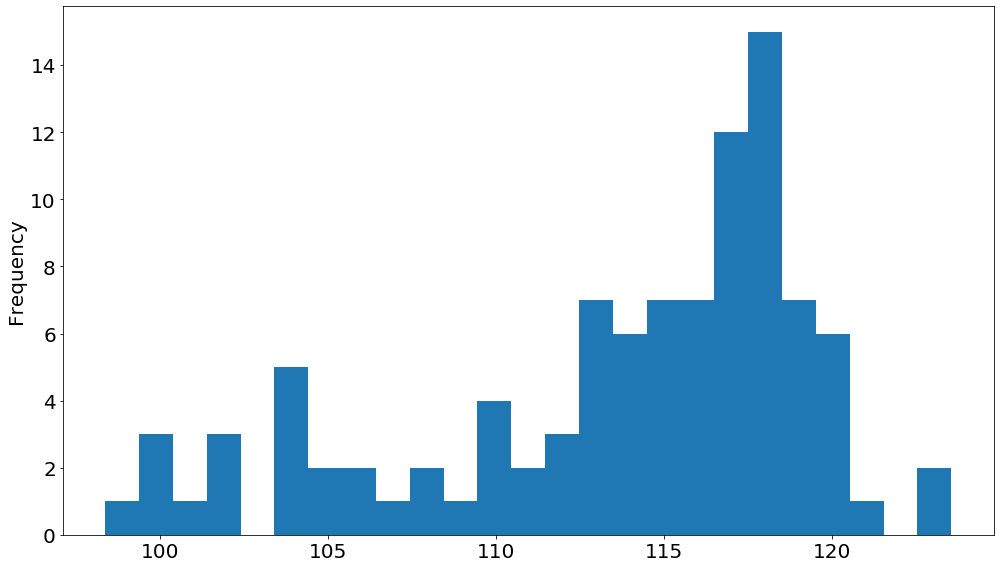

In [11]:
#直观：
import statsmodels.tsa.api as smt
#Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(1,1)
#     ts_ax=plt.subplot2grid(layout,(0,0))
    hist_ax=plt.subplot2grid(layout,(0,0))
#     acf_ax=plt.subplot2grid(layout,(1,0))
#     pacf_ax=plt.subplot2grid(layout,(1,1))
#     y.plot(ax=ts_ax)
#     ts_ax.set_title(title,font)
    y.plot(ax=hist_ax,kind='hist',bins=25)
#     hist_ax.set_title('Histogram')
#     smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
#     smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
#     [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
#     sns.despine()
    plt.ylabel("Frequency",font)
    plt.tick_params(labelsize=20)
    plt.tight_layout()
    plt.savefig(save_path + '观察数据2图.png')
    #return ts_ax,acf_ax,pacf_ax
tsplot(ts, title='VIS', lags=30)


## 检验时间序列的平稳性

In [12]:
# 移动平均图

font = {'weight' : 'normal',
'size' : 20,
}

def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
    fig=plt.figure(figsize=(20,10))
    timeseries.plot(color='blue', label='Original', fontsize=20)
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best',prop = font)
    plt.tick_params(labelsize=20)
    plt.title('Rolling Mean & Standard Deviation',font)
    plt.savefig(save_path + '检查数据平稳性.png')

    plt.show()
 
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
 
#Dickey-Fuller test:
def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

<Figure size 432x288 with 0 Axes>

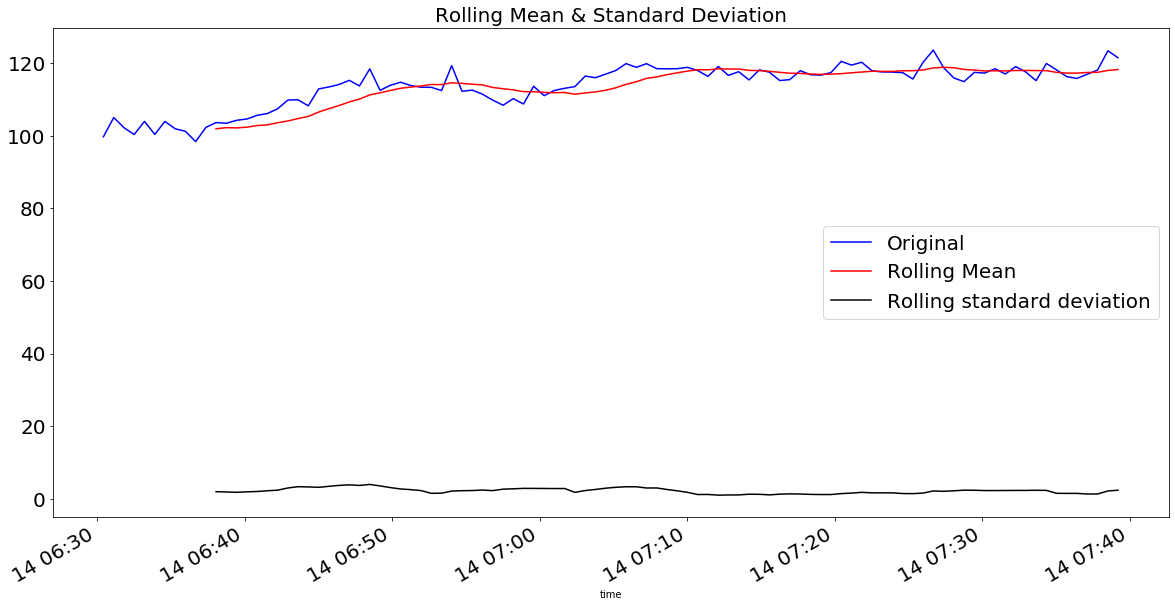

In [13]:

draw_trend(ts,12)

---
通过上图，我们可以发现数据的移动平均值/标准差是稳定的。接下来我们再看Dickey-Fuller的结果

In [14]:
teststationarity(ts).to_csv(save_path + '原数据评估.csv')
teststationarity(ts)

Test Statistic                 -1.574351
p-value                         0.496464
#Lags Used                      1.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

## 差分

In [15]:
# diff_12 = ts_log.diff(12)
# diff_12.dropna(inplace=True)
diff_1 = ts.diff(1)
diff_1.dropna(inplace=True)
teststationarity(diff_1).to_csv(save_path + '一阶差分后评估.csv')
teststationarity(diff_1)

Test Statistic                -1.523486e+01
p-value                        5.259707e-28
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64

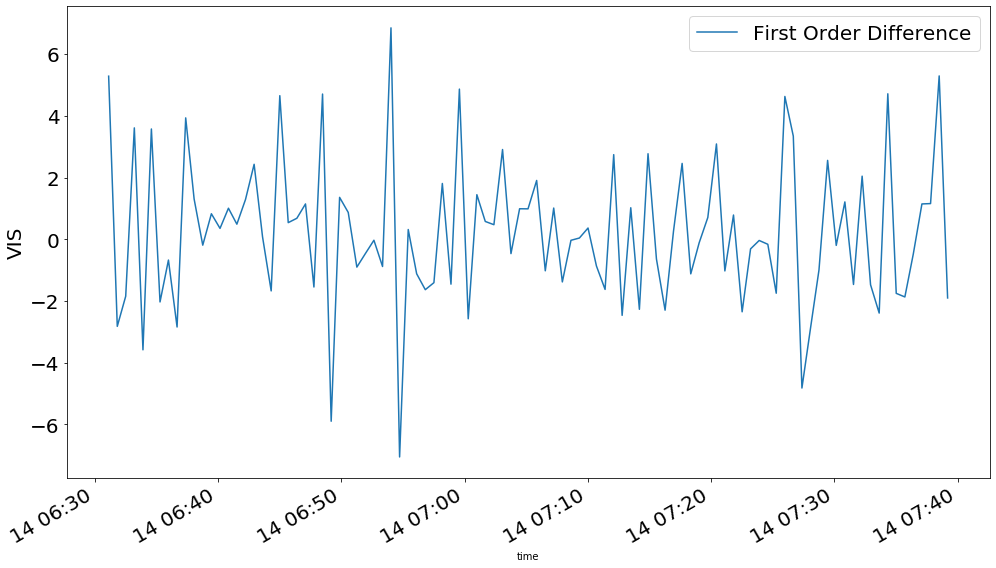

In [16]:
#直观：
import statsmodels.tsa.api as smt
#Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(1,1)
    ts_ax=plt.subplot2grid(layout,(0,0))
#     hist_ax=plt.subplot2grid(layout,(1,0))
#     acf_ax=plt.subplot2grid(layout,(1,0))
#     pacf_ax=plt.subplot2grid(layout,(1,1))
    y.plot(ax=ts_ax,label = 'First Order Difference')
#     ts_ax.set_title(title,font)
#     y.plot(ax=hist_ax,kind='hist',bins=25)
#     hist_ax.set_title('Histogram')
#     smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
#     smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
#     [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
#     sns.despine()
    plt.tick_params(labelsize=20)
    plt.legend(loc='best',prop = font)
    plt.tight_layout()
    plt.ylabel("VIS",font)

    plt.savefig(save_path + '一阶差分.png')
    #return ts_ax,acf_ax,pacf_ax
tsplot(diff_1, title='VIS', lags=30)


<Figure size 432x288 with 0 Axes>

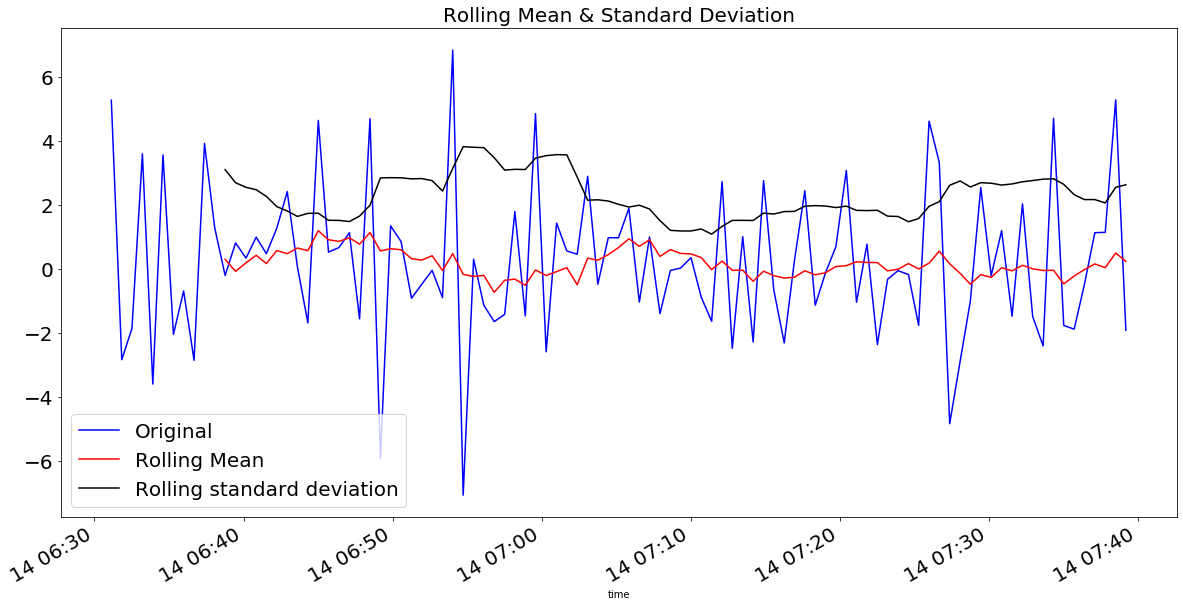

In [19]:
def draw_trend1(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
    fig=plt.figure(figsize=(20,10))
    timeseries.plot(color='blue', label='Original', fontsize=20)
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best',prop = font)
    plt.tick_params(labelsize=20)
    plt.title('Rolling Mean & Standard Deviation',font)
    plt.savefig(save_path + 'diff检查数据平稳性.png')

    plt.show()

draw_trend1(diff_1,12)

## 调参

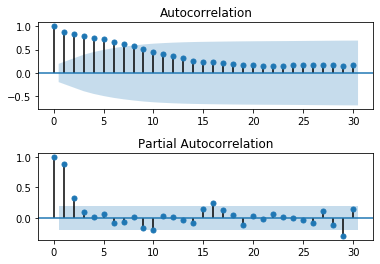

In [20]:
#数据平稳后，需要对模型定阶，即确定p、q的阶数。先画出ACF,PACF的图像
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(save_path + '原自相关.png')

    plt.show()
draw_acf_pacf(ts,30)
#延迟时值为30

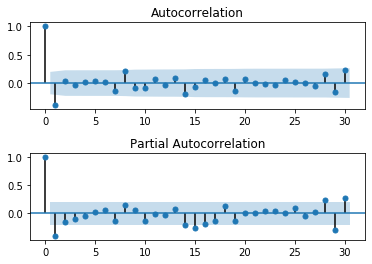

In [21]:
#数据平稳后，需要对模型定阶，即确定p、q的阶数。先画出ACF,PACF的图像
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(save_path + 'diff自相关.png')

    plt.show()
draw_acf_pacf(diff_1,30)
#延迟时值为30

---
观察上图，发现自相关和偏相系数都存在拖尾的特点，自相关5阶拖尾，偏自相关3阶截尾，（）并且他们都具有明显的一阶相关性），所以我们设定p=5, q=0,由于原数据未经过差分处理，因此的 d = 0。下面就可以使用ARMA模型进行数据拟合了。（Ps.PACF是判定AR模型阶数的，也就是p。ACF是判断MA阶数的，也就是q）

## 调参

In [22]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts, order=(4,0,5)) 
# result_arima = model.fit( disp=-1, method='css')

p_min = 0
d_min = 1
q_min = 0
p_max = 5
d_max = 1
q_max = 5

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = ARIMA(ts, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit( disp=-1, method='css')
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

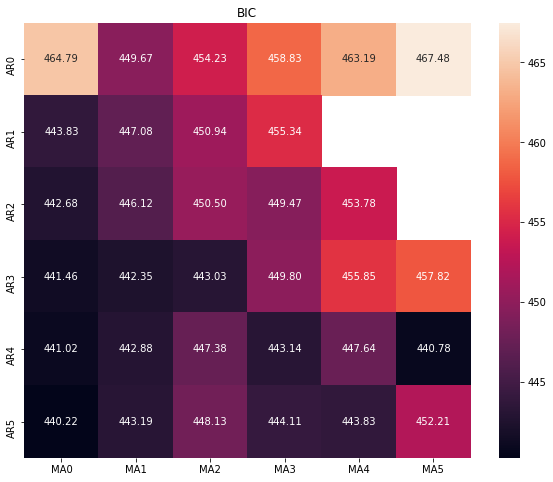

In [23]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

In [24]:
# AIC

In [25]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts, order=(4,0,5)) 
# result_arima = model.fit( disp=-1, method='css')

p_min = 0
d_min = 1
q_min = 0
p_max = 5
d_max = 1
q_max = 5

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = ARIMA(ts, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit( disp=-1, method='css')
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. 

Text(0.5, 1, 'AIC')

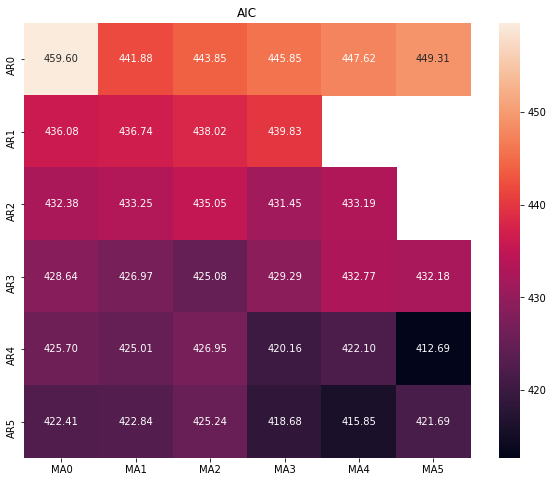

In [26]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
aic = ax.set_title('AIC')
aic

In [21]:
# train_results = sm.tsa.arma_order_select_ic(
#                             ts, 
#                             ic=['aic', 'bic'],
#                             trend='nc', 
#                             max_ar=4, 
#                             max_ma=4)

# print('AIC', train_results.aic_min_order)
# print('BIC', train_results.bic_min_order)

In [22]:
# result_arima.plot_diagnostics(figsize=(16, 12))

## 建模

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff_1, order=(3,1,2)) 
result_arima = model.fit( disp=-1, method='css')
# result_arima = model.fit( )

#模型拟合完后，我们就可以对其进行预测了。####由于ARMA拟合的是经过相关预处理后的数据，故其预测值需要通过相关逆变换进行还原。

D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\set_up\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information

In [28]:
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = ts.shift(1)  #强制将ts转成diff_1
diff_recover_1 = predict_ts.add(diff_shift_ts)

diff_recover_1.dropna(inplace=True)
# # 再次一阶差分还原
# rol_shift_ts = rol_mean.shift(1)
# diff_recover = diff_recover_1.add(rol_shift_ts)
# # 移动平均还原
# rol_sum = ts_log.rolling(window=11).sum()
# rol_recover = diff_recover*12 - rol_sum.shift(1)
# # 对数还原
# log_recover = np.exp(rol_recover)

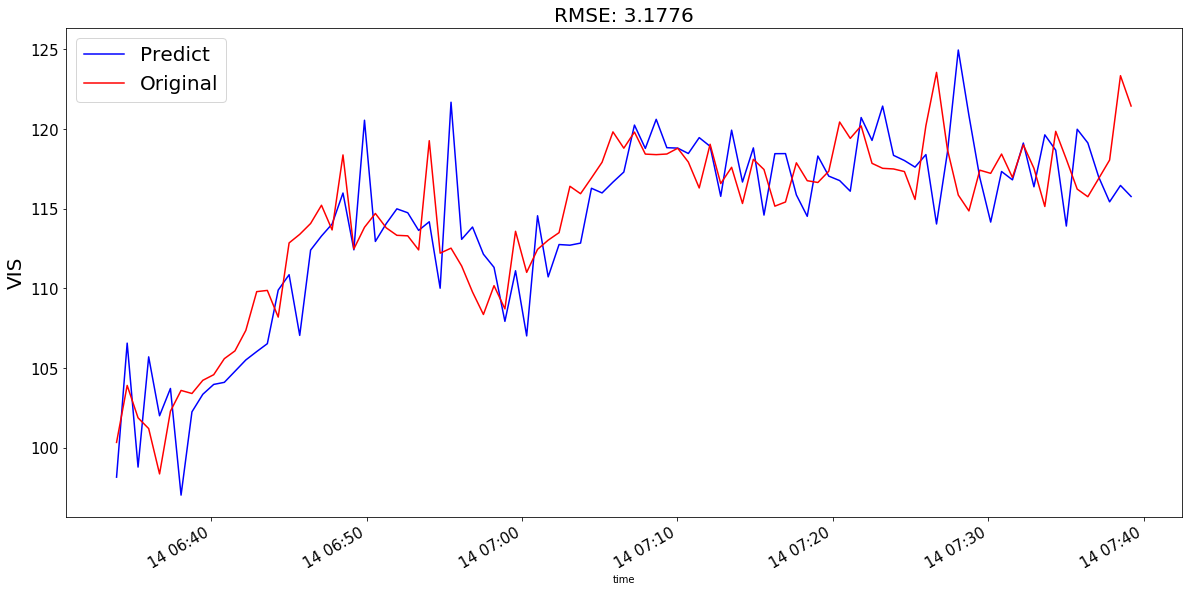

In [29]:
#我们使用均方根误差（RMSE）来评估模型样本内拟合的好坏。利用该准则进行判别时，需要剔除“非预测”数据的影响。
ts= ts[diff_recover_1.index].copy()  # 过滤没有预测的记录plt.figure(facecolor='white')

font = {'weight' : 'normal',
'size' : 20,
}
plt.figure(figsize=(20,10))
diff_recover_1.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best',prop = font)
plt.tick_params(labelsize=15)
plt.ylabel("VIS",font)
plt.title('RMSE: %.4f'% np.sqrt(sum((diff_recover_1-ts)**2)/ts.size),font)
# plt.savefig(save_path + '对比图.png')
plt.show()

In [13]:
ts.head()

time
2016-04-14 06:35:59    101.208807
2016-04-14 06:36:41     98.363636
2016-04-14 06:37:23    102.298295
2016-04-14 06:38:04    103.602273
2016-04-14 06:38:46    103.410511
Name: VIS, dtype: float64

In [12]:
diff_recover_1.head()

time
2016-04-14 06:35:59    105.709882
2016-04-14 06:36:41    102.013906
2016-04-14 06:37:23    103.725636
2016-04-14 06:38:04     97.033015
2016-04-14 06:38:46    102.258191
dtype: float64

In [29]:
diff_recover_1

time
2016-04-14 06:30:26           NaN
2016-04-14 06:31:08           NaN
2016-04-14 06:31:50           NaN
2016-04-14 06:32:31           NaN
2016-04-14 06:33:13           NaN
                          ...    
2016-04-14 07:36:24    119.531695
2016-04-14 07:37:06    116.364582
2016-04-14 07:37:48    115.940485
2016-04-14 07:38:30    116.934539
2016-04-14 07:39:11    115.829361
Length: 100, dtype: float64

In [30]:
ts

time
2016-04-14 06:30:26     99.700284
2016-04-14 06:31:08    104.987216
2016-04-14 06:31:50    102.163352
2016-04-14 06:32:31    100.315341
2016-04-14 06:33:13    103.926136
                          ...    
2016-04-14 07:36:24    115.758523
2016-04-14 07:37:06    116.903409
2016-04-14 07:37:48    118.059659
2016-04-14 07:38:30    123.355114
2016-04-14 07:39:11    121.451704
Name: VIS, Length: 100, dtype: float64

## 预测

In [79]:
# forecast方法会自动进行差分还原，当然仅限于支持的1阶和2阶差分
forecast_n = 12#预测未来12个天走势
forecast = result_arima.forecast(forecast_n)
forecast = forecast[0]
print (forecast)

[ 0.19015146  0.0817223   0.30455802 -0.22708087  0.31342609 -0.12665511
  0.22125581 -0.07812014  0.17697983 -0.04795167  0.1402614  -0.02542402]


In [80]:
import datetime
f_index = [predict_ts.index[-1] + datetime.timedelta(seconds = 42)*(i+1) for i in range(forecast_n)]

f_series = pd.Series(forecast,index = f_index) #预测的未来能见度

no_diff_pred = f_series.cumsum()*20+ ts.iloc[-1] -7
no_diff_pred.to_csv(save_path + '第二篇第四问预测未来.csv')

In [81]:
# save_diff = diff_recover_1.copy()
# save_diff = pd.DataFrame(save_diff)
# save_diff['time'] = save_diff.index
# save_diff.time = save_diff.time.apply(lambda x:x.strftime('%Y-%m-%d %H:%M:%S'))
# save_diff
# save_diff.to_csv('diff_recover_1.csv')

In [89]:
#造数据
no_diff_pred = pd.read_csv(save_path + '第二篇第四问造数据预测未来.csv')
no_diff_pred  = no_diff_pred.iloc[:,1].to_list()
no_diff_pred = pd.Series(no_diff_pred,index =f_index )
no_diff_pred

2016-04-14 07:39:53    122.157671
2016-04-14 07:40:35    125.247159
2016-04-14 07:41:17    124.220171
2016-04-14 07:41:59    125.005682
2016-04-14 07:42:41    122.653409
2016-04-14 07:43:23    122.340909
2016-04-14 07:44:05    122.301136
2016-04-14 07:44:47    122.137784
2016-04-14 07:45:29    120.387784
2016-04-14 07:46:11    125.017046
2016-04-14 07:46:53    128.360795
2016-04-14 07:47:35    123.536932
dtype: float64

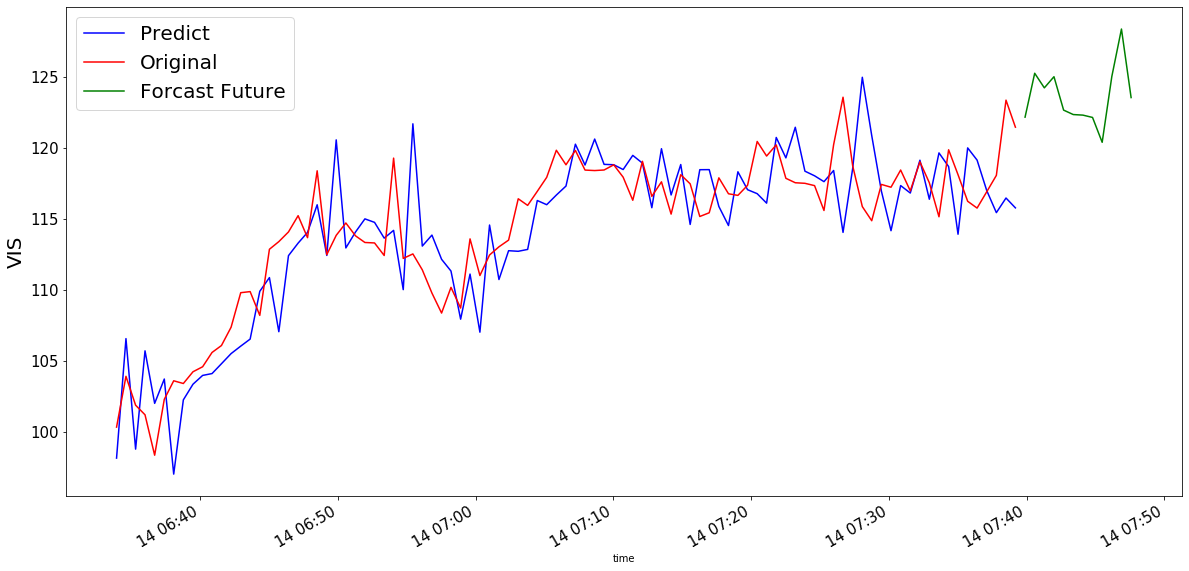

In [91]:
#我们使用均方根误差（RMSE）来评估模型样本内拟合的好坏。利用该准则进行判别时，需要剔除“非预测”数据的影响。
ts= ts[diff_recover_1.index].copy()  # 过滤没有预测的记录plt.figure(facecolor='white')

font = {'weight' : 'normal',
'size' : 20,
}
plt.figure(figsize=(20,10))
diff_recover_1.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')

no_diff_pred.plot(color = 'green',label = 'Forcast Future')
plt.legend(loc='best',prop = font)
plt.tick_params(labelsize=15)
plt.ylabel("VIS",font)
# plt.title('RMSE: %.4f'% np.sqrt(sum((diff_recover_1-ts)**2)/ts.size),font)
plt.savefig(save_path + '预测未来对比图.png')
plt.show()

## 总结
ARIMA的建模过程如下：

获取被观测系统时间序列数据；
对数据绘图，观测是否为平稳时间序列；对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列；
经过第二步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数ACF 和偏自相关系数PACF，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q
由以上得到的d、q、p，得到ARIMA模型。然后开始对得到的模型进行模型检验。

In [12]:
import statsmodels
statsmodels.__version__

'0.11.0'